# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [12]:
def newton_iteration(f, fder, x_0, eps=1e-5, max_it=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = 0
    x_n = x_0
    n_it = 0
    while (abs(x - x_n) > eps) and (n_it < max_it):
        x = x_n
        x_n = x - f(x)/fder(x)
        n_it += 1
    return x_n, n_it

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [13]:
f = lambda x: x**2 - 1
fder = lambda x: 2*x


x, i = newton_iteration(f, fder, 2, 1e-10)
print('Нулевая точка функции:', x)
print('Кол-во итераций:', i)

Нулевая точка функции: 1.0
Кол-во итераций: 6


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

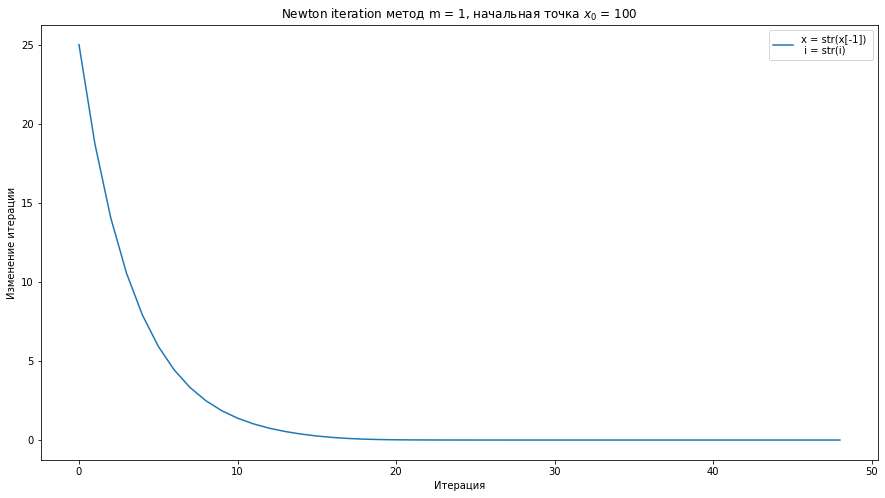

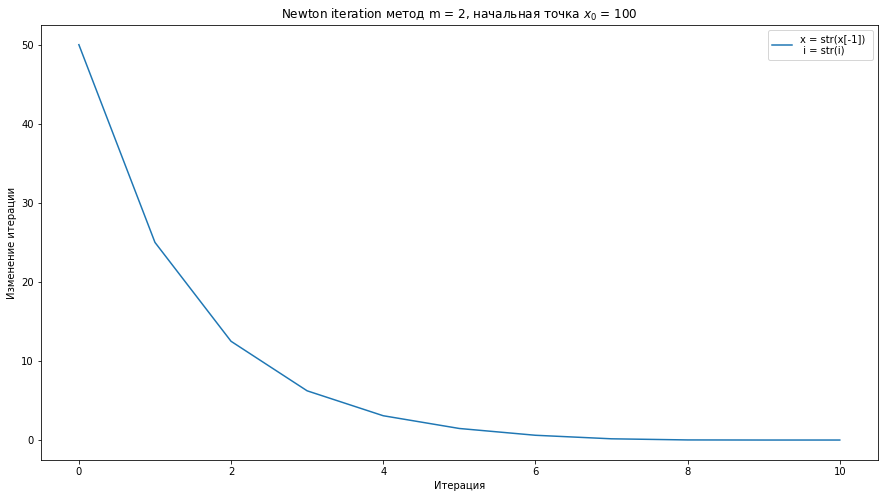

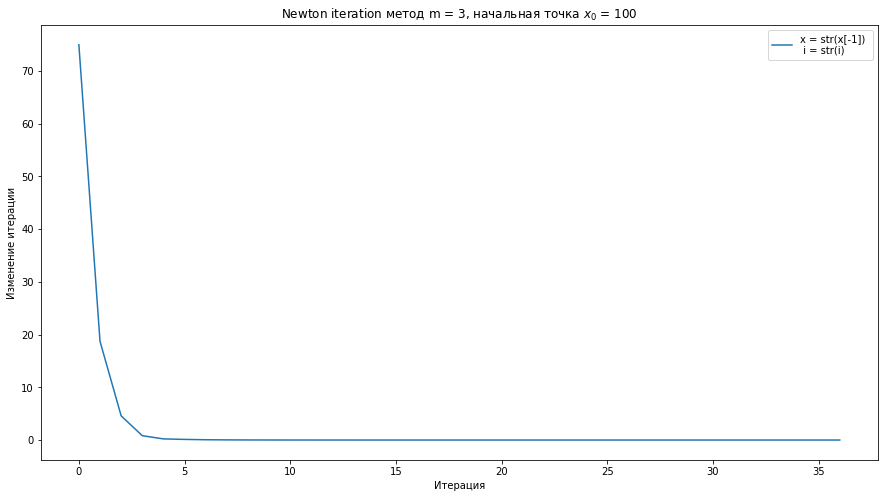

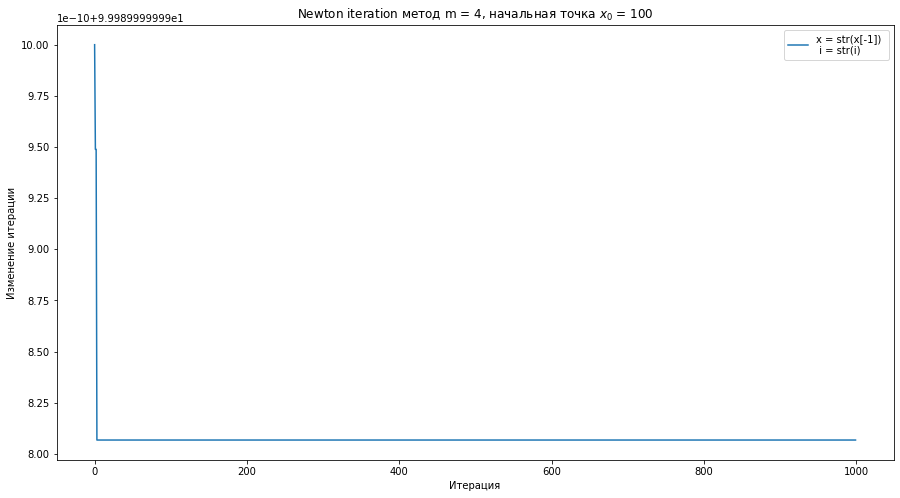

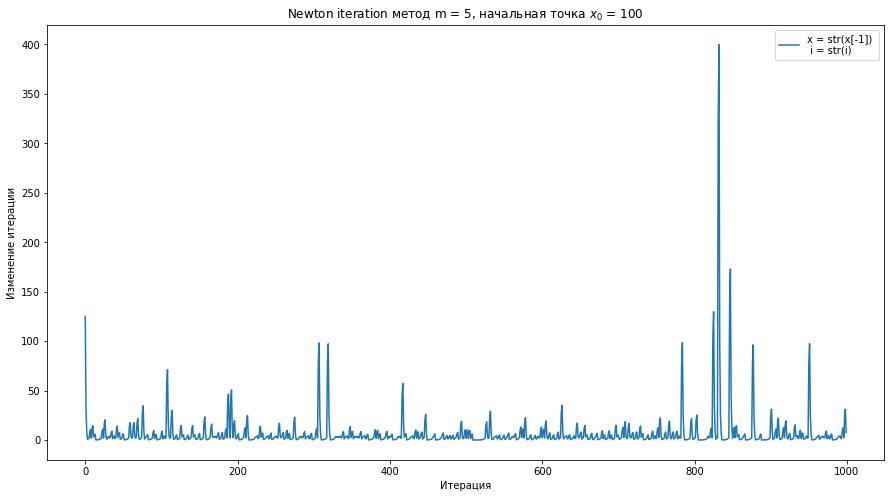

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt


def modified_newton_iteration(f, fder, x_0, m = 1, eps=1e-5, max_it=1000):
    x_n = [x_0]
    n_it = 0

    while ((n_it < max_it) & (abs(x_n[-1] - x_n[-2]) > eps)):
        deriv = fder(x_n[-1])
        if fder(x_n[-1]) == 0:
            if f(x_n[-1]) == 0:
                return x_n, i
            assert f(x_n[-1]) != 0
        
        x_n.append(x_n[-1] - m * f(x_n[-1]) / deriv)
        n_it += 1
        
    return x_n, n_it


f = lambda x: (x**2 - 1)**2
fder = lambda x: 4*x*(x**2 - 1)
x0 = 100

if __name__ == '__main__':
    for j in range(1, 6):
        x, i = newton_iteration(f, fder, x0, j, 1e-10)
        plt.figure(figsize=(15, 8))
        plt.title('Newton iteration метод m = %i, начальная точка $x_0$ = %s' % (j, x0))
        plt.xlabel('Итерация')
        plt.ylabel('Изменение итерации')
        plt.plot(range(i), [abs(x[1:][j] - x[:-1][j]) for j in range(i)], label='x = str(x[-1]) \n i = str(i)')
        plt.legend()

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

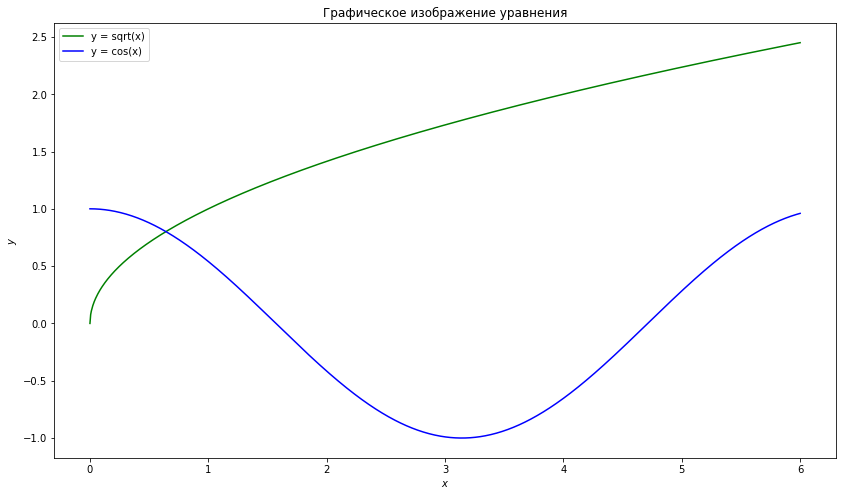

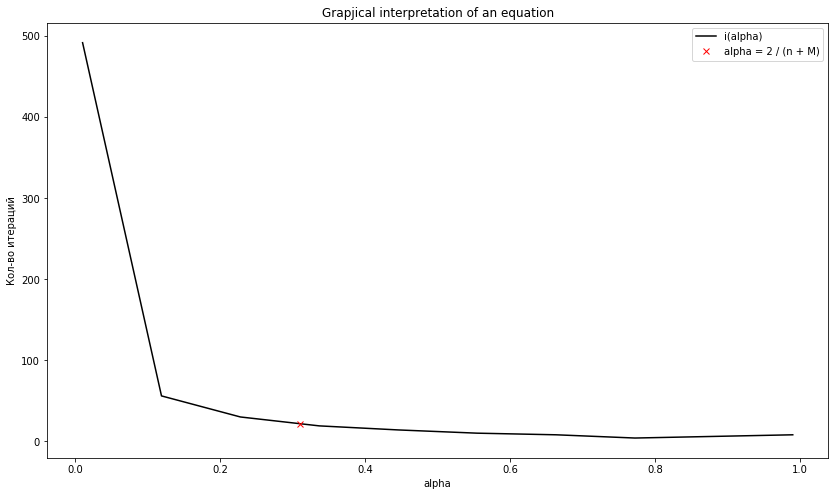

In [49]:
import numpy as np


def fixed_point(f, x0, alpha = 1, eps=1e-5, max_it=1000):
    x_n = [x0]
    i = 0
    while i == 0 or ((i < max_it) & (abs(x_n[-1] - x_n[-2]) >= eps)):
        x_n.append(x_n[-1] - alpha * f(x_n[-1]))
        i += 1
        
    return x_n, i


f = lambda x: np.sqrt(x) - np.cos(x)
fder = lambda x: 1 / (2 * np.sqrt(x)) + np.sin(x)
M = np.max(np.abs(fder(x[1:])))
m = np.min(np.abs(fder(x[1:])))
alpha = np.linspace(0.01, 0.99, 10)
x0 = 1


if __name__ == '__main__':
    n = 1000
    x = np.linspace(0, 6, n)
    y1 = np.sqrt(x)
    y2 = np.cos(x)
    plt.figure(figsize=(14, 8))
    plt.title('Графическое изображение уравнения')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.plot(x, y1, label='y = sqrt(x)', color = 'g')
    plt.plot(x, y2, label='y = cos(x)', color = 'b')
    plt.legend()
    I = [fixed_point(f, x0, i)[1] for i in alpha]
    plt.figure(figsize=(14, 8))
    plt.title('Grapjical interpretation of an equation')
    plt.xlabel('alpha')
    plt.ylabel('Кол-во итераций')
    plt.plot(alpha, I, label='i(alpha)', color = 'k')
    plt.plot(2 / (m + M), fixed_point(f, x0, 2 / (m + M))[1], 'x', label='alpha = 2 / (n + M)', color = 'r')
    plt.legend()

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.